In [78]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier

# Load the training and test data
train_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Fiverr/edcogan/Bank/bank_train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Fiverr/edcogan/Bank/bank_test.csv')

# Exploratory Data Analysis

In [56]:
train_data

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,1,-1,0,unknown,no
1,1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,1,-1,0,unknown,no
2,2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1,-1,0,unknown,no
3,3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,1,-1,0,unknown,no
4,4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44206,45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,3,-1,0,unknown,yes
44207,45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,2,-1,0,unknown,yes
44208,45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,5,184,3,success,yes
44209,45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,4,-1,0,unknown,no


In [57]:
# Display summary statistics of numerical features
train_data.describe()

,Unnamed: 0,age,balance,day,campaign,pdays,previous
count,44211.000000,44211.000000,44211.000000,44211.000000,44211.000000,44211.000000,44211.000000
mean,22614.856846,40.930040,1363.799462,15.811676,2.762751,40.210626,0.580715
std,13057.312051,10.620088,3052.574757,8.324843,3.094049,100.114045,2.311291
min,0.000000,18.000000,-8019.000000,1.000000,1.000000,-1.000000,0.000000
25%,11306.500000,33.000000,72.000000,8.000000,1.000000,-1.000000,0.000000
50%,22616.000000,39.000000,448.000000,16.000000,2.000000,-1.000000,0.000000
75%,33931.500000,48.000000,1430.000000,21.000000,3.000000,-1.000000,0.000000
max,45210.000000,95.000000,102127.000000,31.000000,58.000000,871.000000,275.000000


In [58]:
# Display information about the dataset including data types and missing values
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44211 entries, 0 to 44210
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  44211 non-null  int64 
 1   age         44211 non-null  int64 
 2   job         44211 non-null  object
 3   marital     44211 non-null  object
 4   education   44211 non-null  object
 5   default     44211 non-null  object
 6   balance     44211 non-null  int64 
 7   housing     44211 non-null  object
 8   loan        44211 non-null  object
 9   contact     44211 non-null  object
 10  day         44211 non-null  int64 
 11  month       44211 non-null  object
 12  campaign    44211 non-null  int64 
 13  pdays       44211 non-null  int64 
 14  previous    44211 non-null  int64 
 15  poutcome    44211 non-null  object
 16  y           44211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.7+ MB


In [59]:
# Check for null values
print(train_data.isnull().sum())

Unnamed: 0    0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
campaign      0
pdays         0
previous      0
poutcome      0
y             0
dtype: int64


In [60]:
# Check for class distribution
print(train_data['y'].value_counts())

no     39015
yes     5196
Name: y, dtype: int64


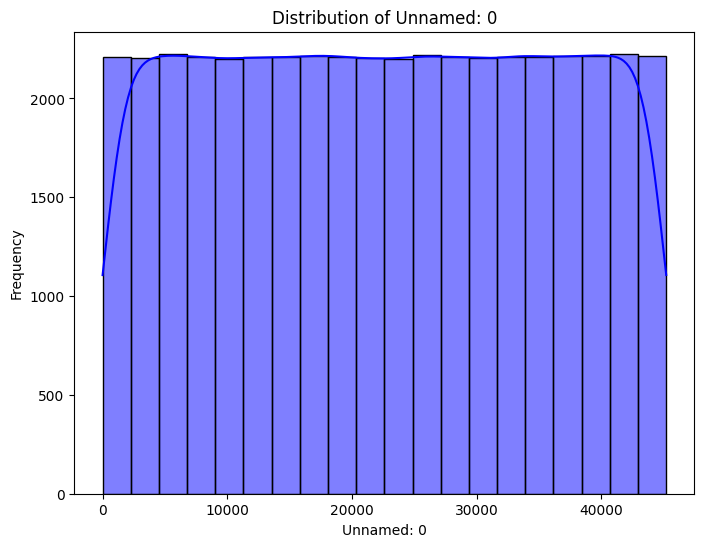

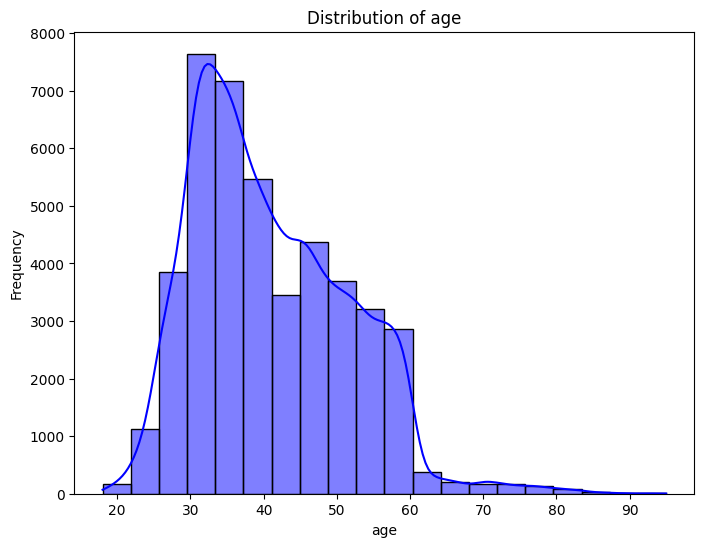

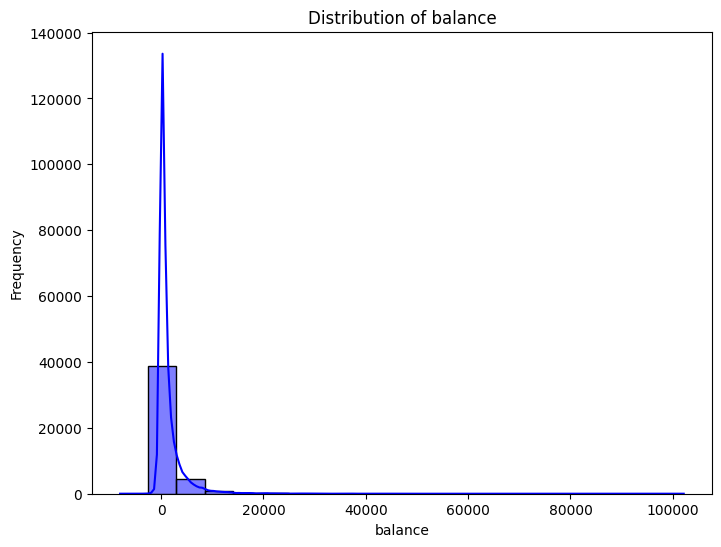

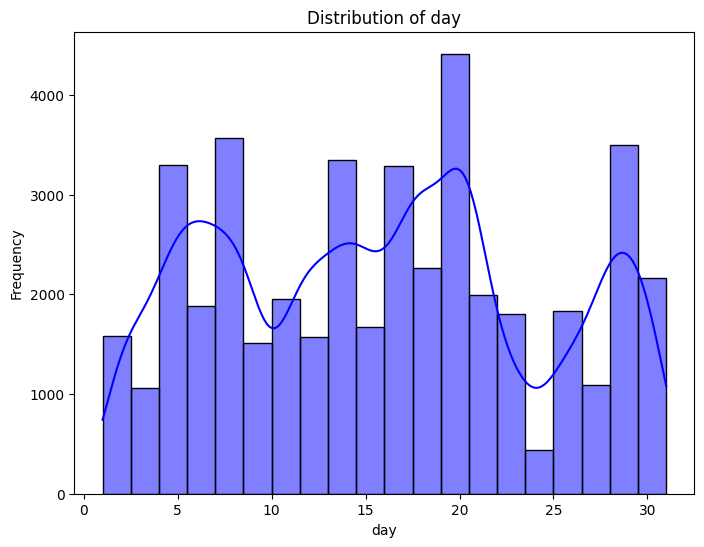

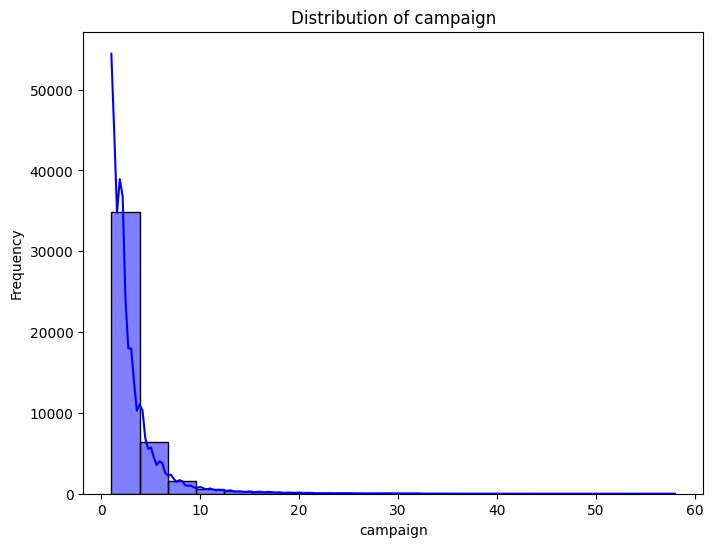

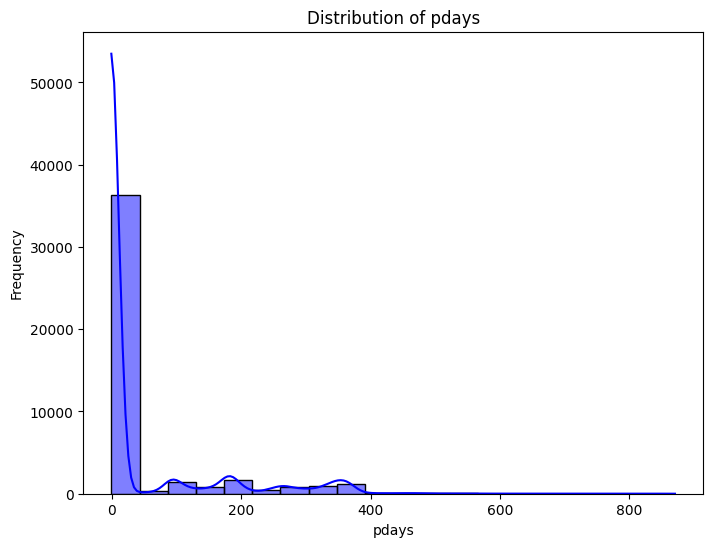

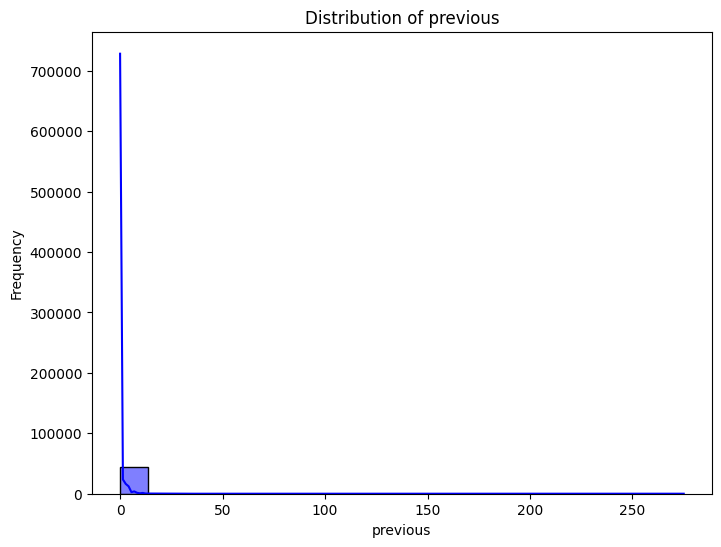

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize distributions of numerical features
numerical_features = train_data.select_dtypes(include=['int64', 'float64']).columns
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(train_data[feature], bins=20, kde=True, color='blue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

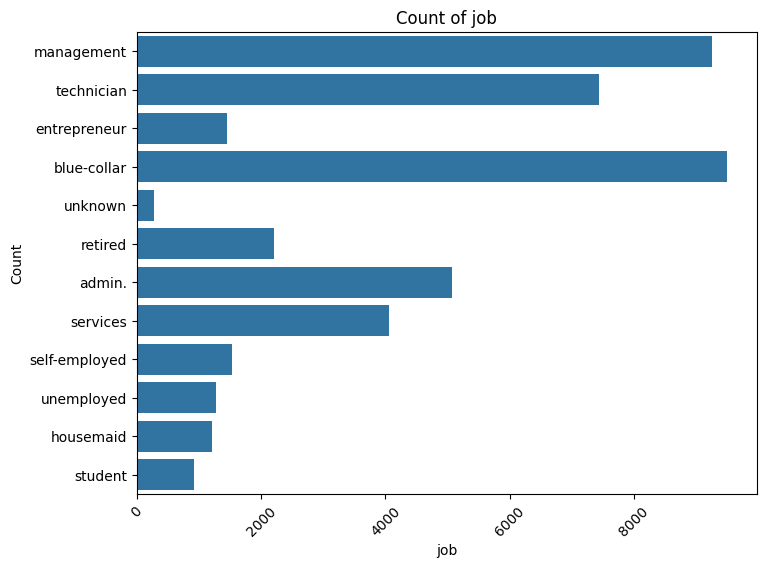

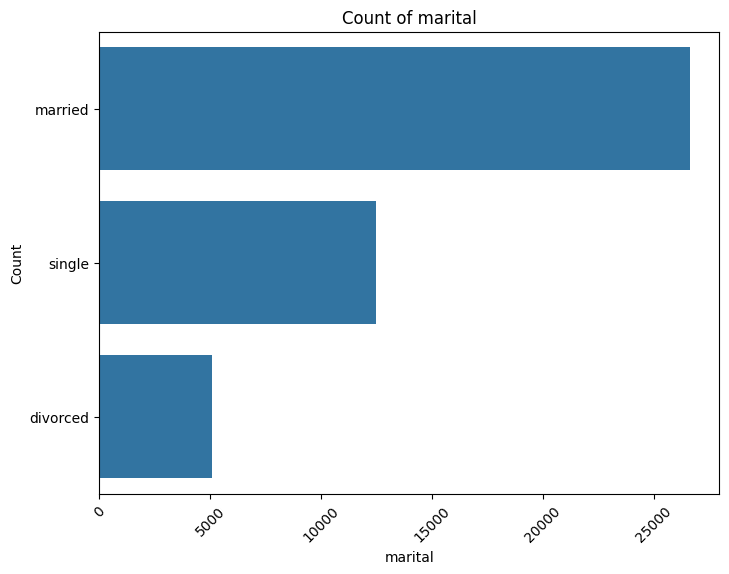

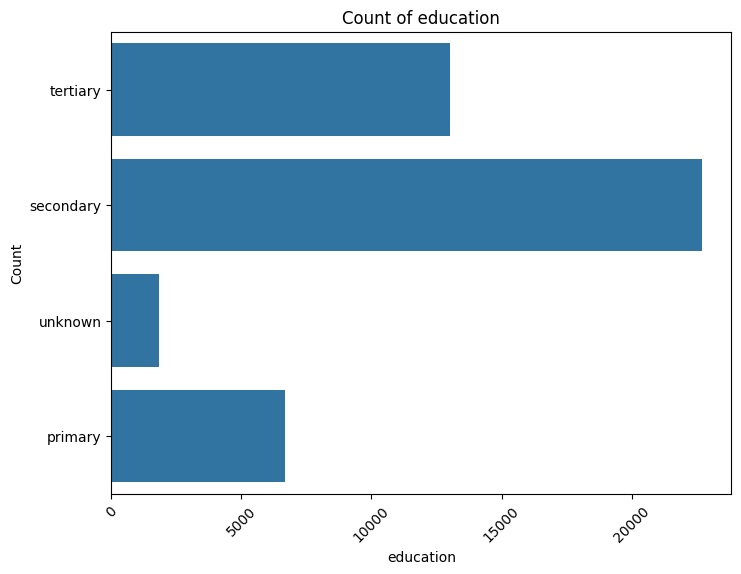

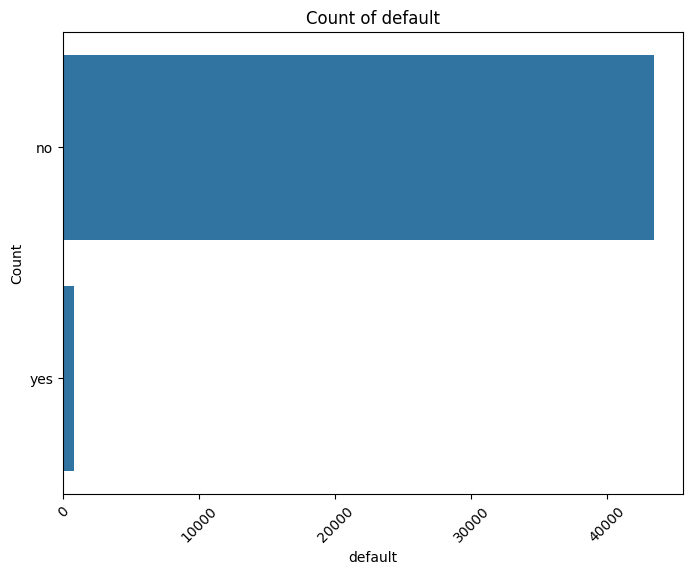

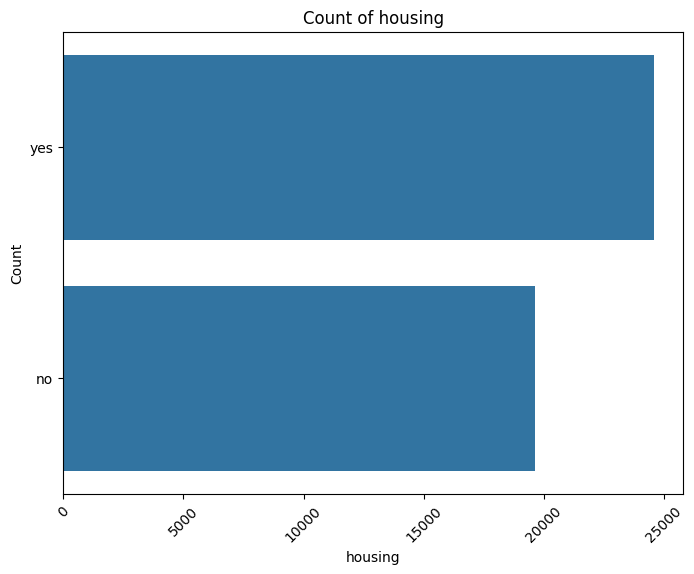

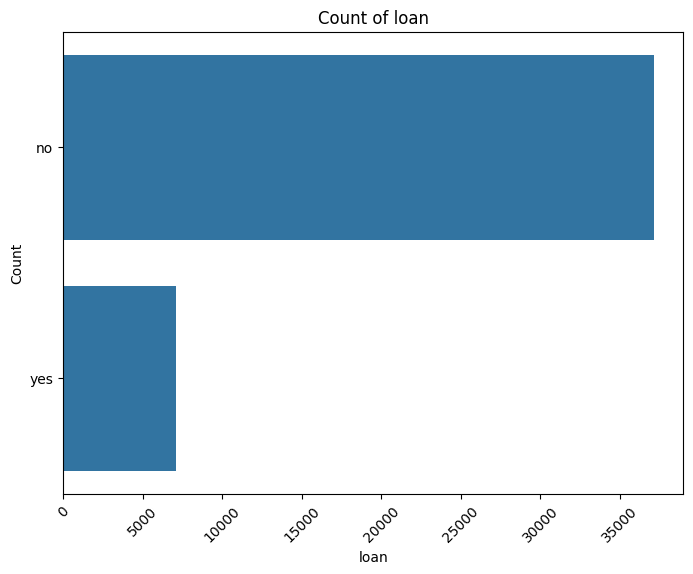

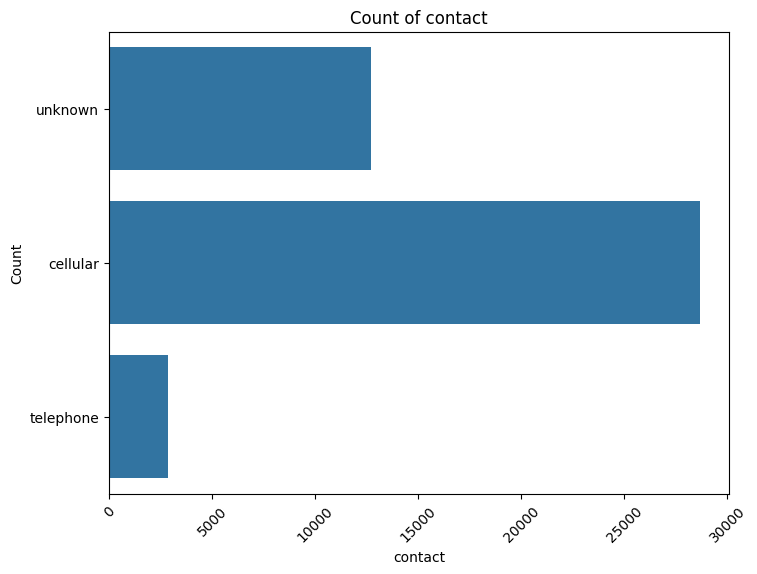

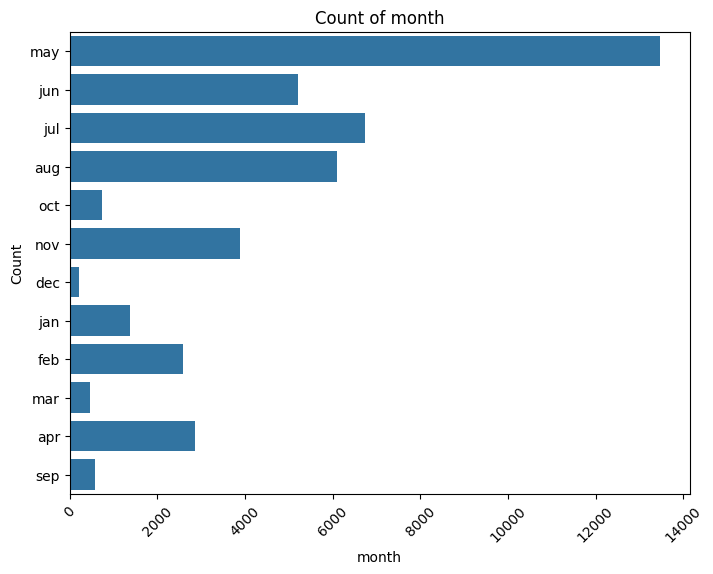

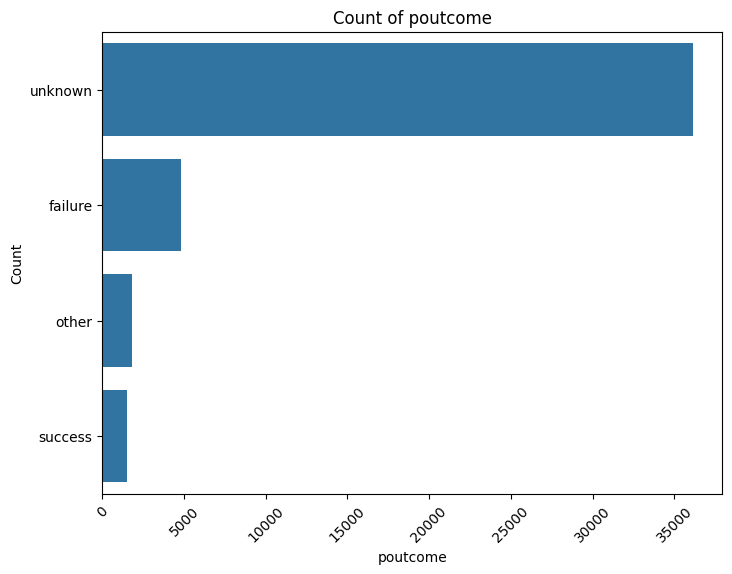

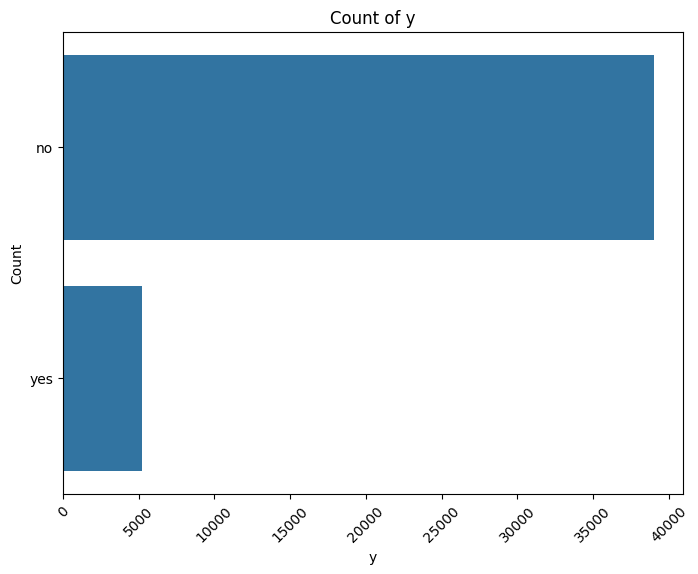

In [63]:
# Visualize distributions of categorical features
categorical_features = train_data.select_dtypes(include='object').columns
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(train_data[feature])
    plt.title(f'Count of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

<ipython-input-65-4688bfaadd95>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")


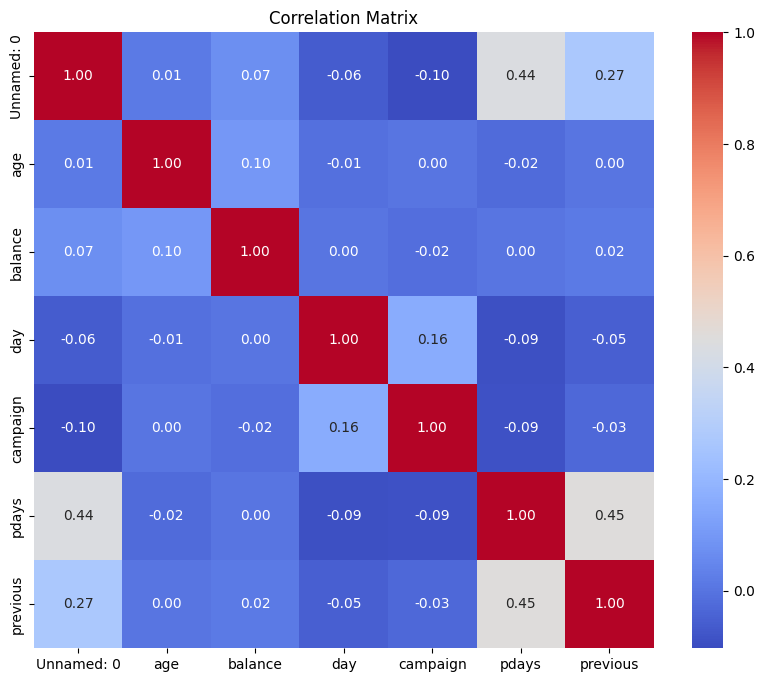

In [65]:
# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Preprocessing

In [70]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

# Load the dataset
data = train_data

# Handle outliers (you can choose your own method, like winsorization, or remove them)
# For example, winsorization using 5th and 95th percentiles
def handle_outliers(df, columns):
    for col in columns:
        q1 = df[col].quantile(0.05)
        q3 = df[col].quantile(0.95)
        df[col] = df[col].apply(lambda x: q1 if x < q1 else q3 if x > q3 else x)
    return df

numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
data = handle_outliers(data, numerical_columns)

# Encode categorical features
label_encoder = LabelEncoder()
categorical_columns = data.select_dtypes(include='object').columns
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

# Standardize features
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Handle nulls (imputation using mean for numerical features and mode for categorical features)
imputer = SimpleImputer(strategy='mean')
data[numerical_columns] = imputer.fit_transform(data[numerical_columns])

imputer = SimpleImputer(strategy='most_frequent')
data[categorical_columns] = imputer.fit_transform(data[categorical_columns])

# Handle unbalanced classes (oversampling using SMOTE)
X = data.drop(columns=['y'])
y = data['y']
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert back to DataFrame
data_resampled = pd.DataFrame(X_resampled, columns=X.columns)
data_resampled['y'] = y_resampled

# Display the class distribution after oversampling
print(data_resampled['y'].value_counts())

# Now you can use data_resampled for further analysis or modeling


0    39015
1    39015
Name: y, dtype: int64


In [71]:
data_resampled

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,1.777859,4,1,2,0,1.028262,1,0,2,-1.324483,8,-0.793280,-0.426826,-0.429996,3,0
1,0.334306,9,2,1,0,-0.793366,1,0,2,-1.324483,8,-0.793280,-0.426826,-0.429996,3,0
2,-0.799914,2,1,1,0,-0.816632,1,1,2,-1.324483,8,-0.793280,-0.426826,-0.429996,3,0
3,0.643639,1,1,3,0,0.479361,1,0,2,-1.324483,8,-0.793280,-0.426826,-0.429996,3,0
4,-0.799914,11,2,3,0,-0.817493,0,0,2,-1.324483,8,-0.793280,-0.426826,-0.429996,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78025,1.691000,4,1,2,0,0.223328,0,0,0,-1.276120,6,-0.793280,-0.426826,-0.429996,3,1
78026,-1.298465,10,2,0,0,-0.759393,0,0,0,-0.322364,0,-0.048518,-0.426826,-0.429996,3,1
78027,0.627398,0,2,1,0,-0.422305,1,0,2,-0.361935,8,0.257494,-0.426826,-0.429996,3,1
78028,0.667927,0,1,1,0,-0.684589,0,0,0,-1.415944,1,-0.793280,-0.426826,-0.429996,3,1


# Modeling & Evaluation:

In [72]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

# Load the preprocessed dataset
data = data_resampled  # Replace 'preprocessed_dataset.csv' with the actual file path

# Split features and target variable
X = data.drop(columns=['y'])
y = data['y']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='f1')

# Logistic Regression model
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_scores = cross_val_score(lr_model, X_train, y_train, cv=5, scoring='f1')

# Print cross-validation F1-scores
print("Random Forest Cross-Validation F1-scores:", rf_scores)
print("Logistic Regression Cross-Validation F1-scores:", lr_scores)

# Fit models and predict on test set
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

# Evaluate F1-score on test set
rf_f1_score = f1_score(y_test, rf_pred)
lr_f1_score = f1_score(y_test, lr_pred)

print("Random Forest Test F1-score:", rf_f1_score)
print("Logistic Regression Test F1-score:", lr_f1_score)


Random Forest Cross-Validation F1-scores: [0.91804878 0.91289538 0.91819213 0.91140266 0.91444759]
Logistic Regression Cross-Validation F1-scores: [0.7226483  0.70996693 0.71687172 0.72149914 0.71984865]
Random Forest Test F1-score: 0.9191242755956214
Logistic Regression Test F1-score: 0.7164329922950612


Summary findings: Random Forest performed better

# Test data

In [76]:
test_data

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome
0,42442,52,entrepreneur,married,primary,no,657,no,no,telephone,7,dec,2,217,1,other
1,30164,34,blue-collar,married,secondary,no,0,yes,yes,cellular,5,feb,6,-1,0,unknown
2,9921,38,housemaid,divorced,primary,no,359,no,no,unknown,9,jun,4,-1,0,unknown
3,31817,58,blue-collar,married,primary,no,189,yes,no,telephone,8,apr,1,-1,0,unknown
4,10333,43,services,married,secondary,no,2478,yes,no,unknown,12,jun,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,10169,38,blue-collar,married,secondary,yes,-10,no,no,unknown,11,jun,1,-1,0,unknown
996,29507,56,unemployed,married,primary,no,5496,yes,no,cellular,3,feb,3,-1,0,unknown
997,39597,60,retired,married,tertiary,no,846,no,no,telephone,26,may,1,-1,0,unknown
998,11892,36,blue-collar,single,primary,no,1313,yes,no,unknown,20,jun,10,-1,0,unknown


In [79]:
# Load the test data

test_data.drop(test_data.columns[[0]], axis=1, inplace=True)

label_encoder = LabelEncoder()
categorical_columns = test_data.select_dtypes(include='object').columns
for col in categorical_columns:
    test_data[col] = label_encoder.fit_transform(test_data[col])

# Standardize features (if necessary)
# Handle nulls (imputation)
imputer = SimpleImputer(strategy='mean')
numerical_columns = test_data.select_dtypes(include=['int64', 'float64']).columns
test_data[numerical_columns] = imputer.fit_transform(test_data[numerical_columns])

imputer = SimpleImputer(strategy='most_frequent')
test_data[categorical_columns] = imputer.fit_transform(test_data[categorical_columns])

# Make predictions on the test data
test_predictions = rf_model.predict(test_data)

# Save the predictions to a CSV file
pd.DataFrame(test_predictions, columns=['y']).to_csv('/content/drive/MyDrive/Colab Notebooks/Fiverr/edcogan/Bank/answers.csv', index=False)
